# Dataset Creation

* This notebook creates the image datasets needed for the project
* The functions needed are defined in the functions_dataCreation.py script



In [2]:
from functions_dataCreation import *

import h5py
import matplotlib.pyplot as plt
import numpy as np

# Disable the Matplotlib rcParams deprecation warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

#CSV file with OHLC prices
df = dataPrep("data/asx_13Jul20.csv")

data_grouped = df.groupby('Symbol')
for name,group in data_grouped:    
    print(name + '  ' + str(group['Symbol'].count()))

# Partial processing
# temp = pd.unique(df['Symbol'])[11:30]
# data = df[df['Symbol'].isin(temp)]
# data = df[df['Symbol'].isin(['A2M.AX'])] #,'AGL.AX','ALL.AX','ALQ.AX'])]

data = df

print(pd.unique(data['Symbol']))

syms = data['Symbol'].unique()
CPU_CORES = mp.cpu_count() * 2
counter = 1
for i in syms:
    print(counter, " : ",i)
    start_time = time.time()
    temp = data[data['Symbol'] == i]    
    result = applyParallel_npsplit(np.array_split(temp,CPU_CORES), createXYarrays)
    gc.collect()
    gc.collect()
    saveXYtoDisk(result,folder="data/",fname="Set" + str(i))
    print("--- %s seconds ---" % (time.time() - start_time))
    counter += 1

## Train Images

In [41]:
fname = "../data/Train/SetA2M.AX.h5"
file = h5py.File(fname, "r")
set_x = file["set_x"][:]
set_y = file["set_y"][:]

print(set_x.shape)
print(set_y.shape)

# Change the target from UP,DOWN and NO CHANGE to UP(1) and NOT UP(0)
set_y[set_y == 1] = 0
set_y[set_y == 2] = 1



(1146, 128, 128, 3)
(1146,)


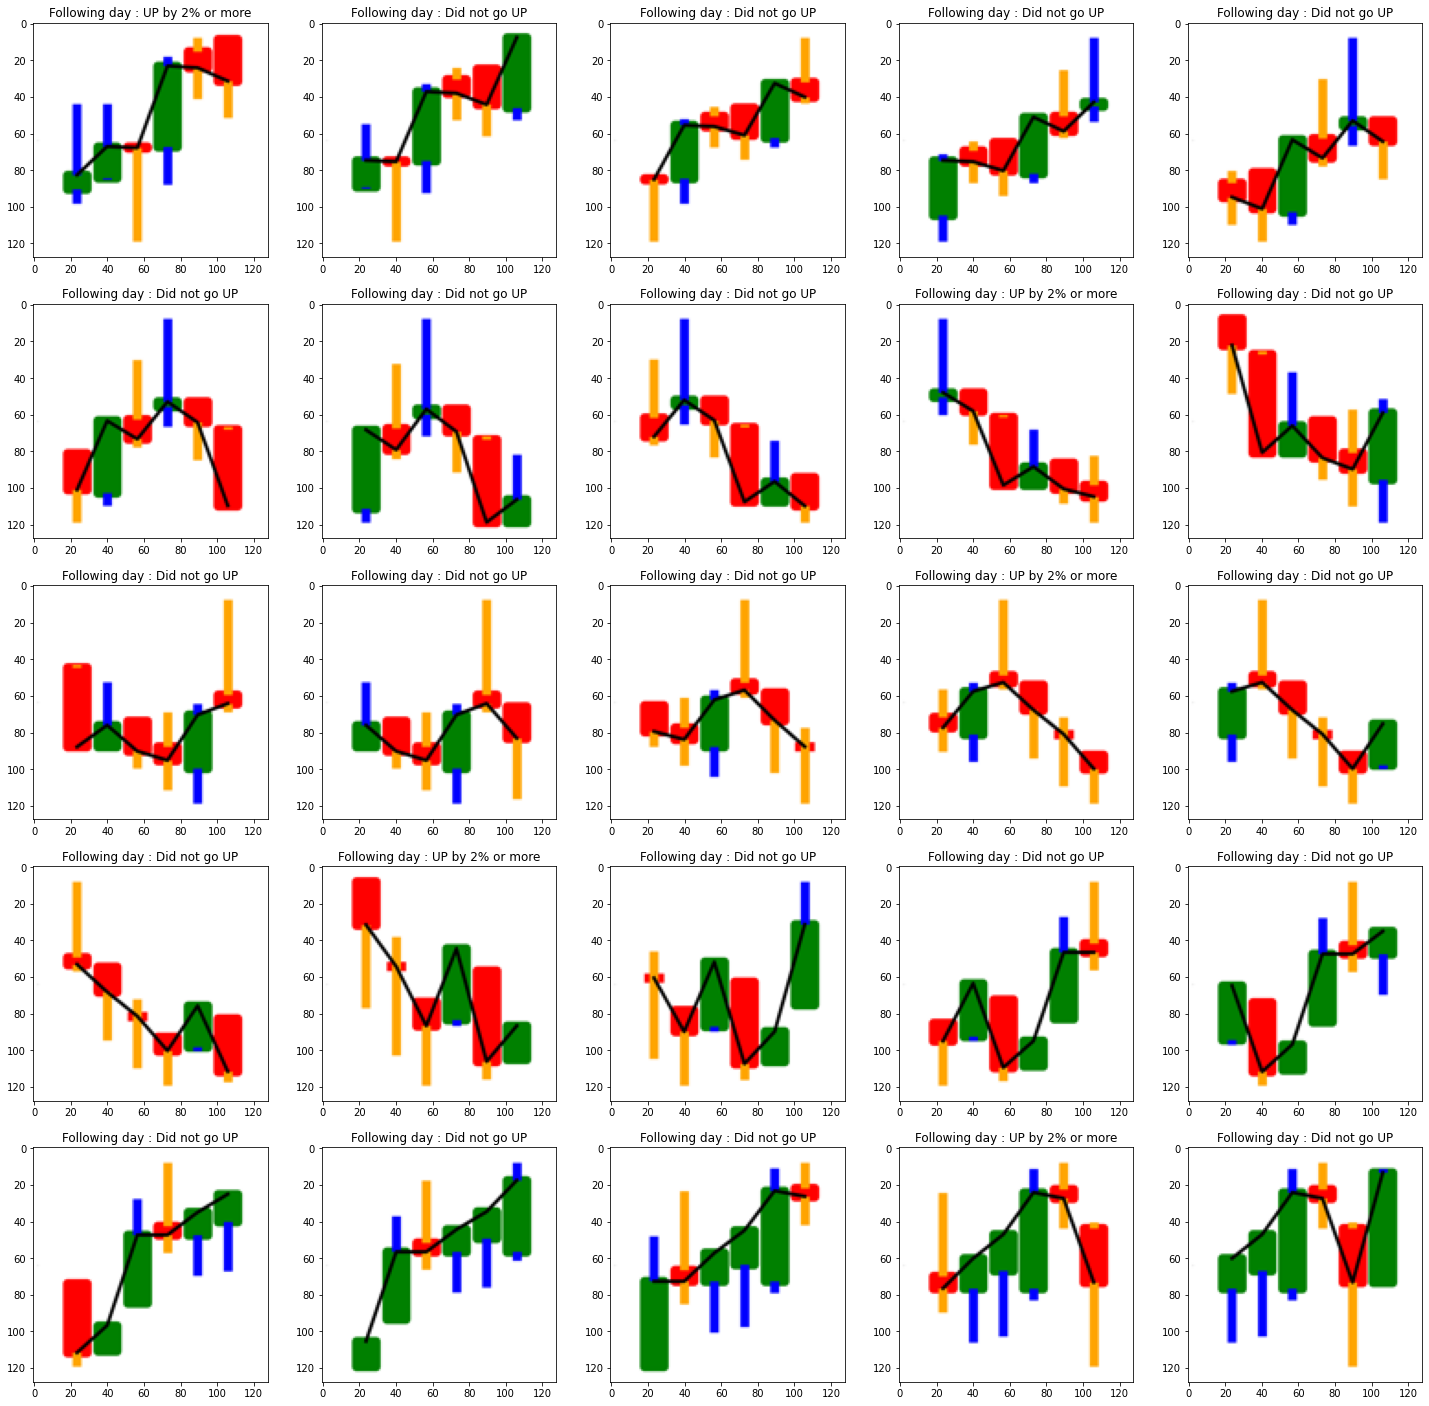

In [61]:

rows = 5
cols = 5
fig, axs = plt.subplots(rows,cols,figsize=(25,25))

for ax,i in zip(np.flip(axs.flatten(),0),range(rows*cols)):
    ax.imshow(set_x[i].astype('uint8'))
    if set_y[i] == 0:
        tgt = 'Did not go UP'
    else:
        tgt = 'UP by 2% or more'
    ax.set_title("Following day : " + tgt)



## Test Images

In [60]:
fname = "../data/Test/SetCIM.AX.h5"
file = h5py.File(fname, "r")
set_x = file["set_x"][:]
set_y = file["set_y"][:]

print(set_x.shape)
print(set_y.shape)

# Change the target from UP,DOWN,NO CHANGE to UP(1) and NOT UP(0)
set_y[set_y == 1] = 0
set_y[set_y == 2] = 1



(5027, 128, 128, 3)
(5027,)


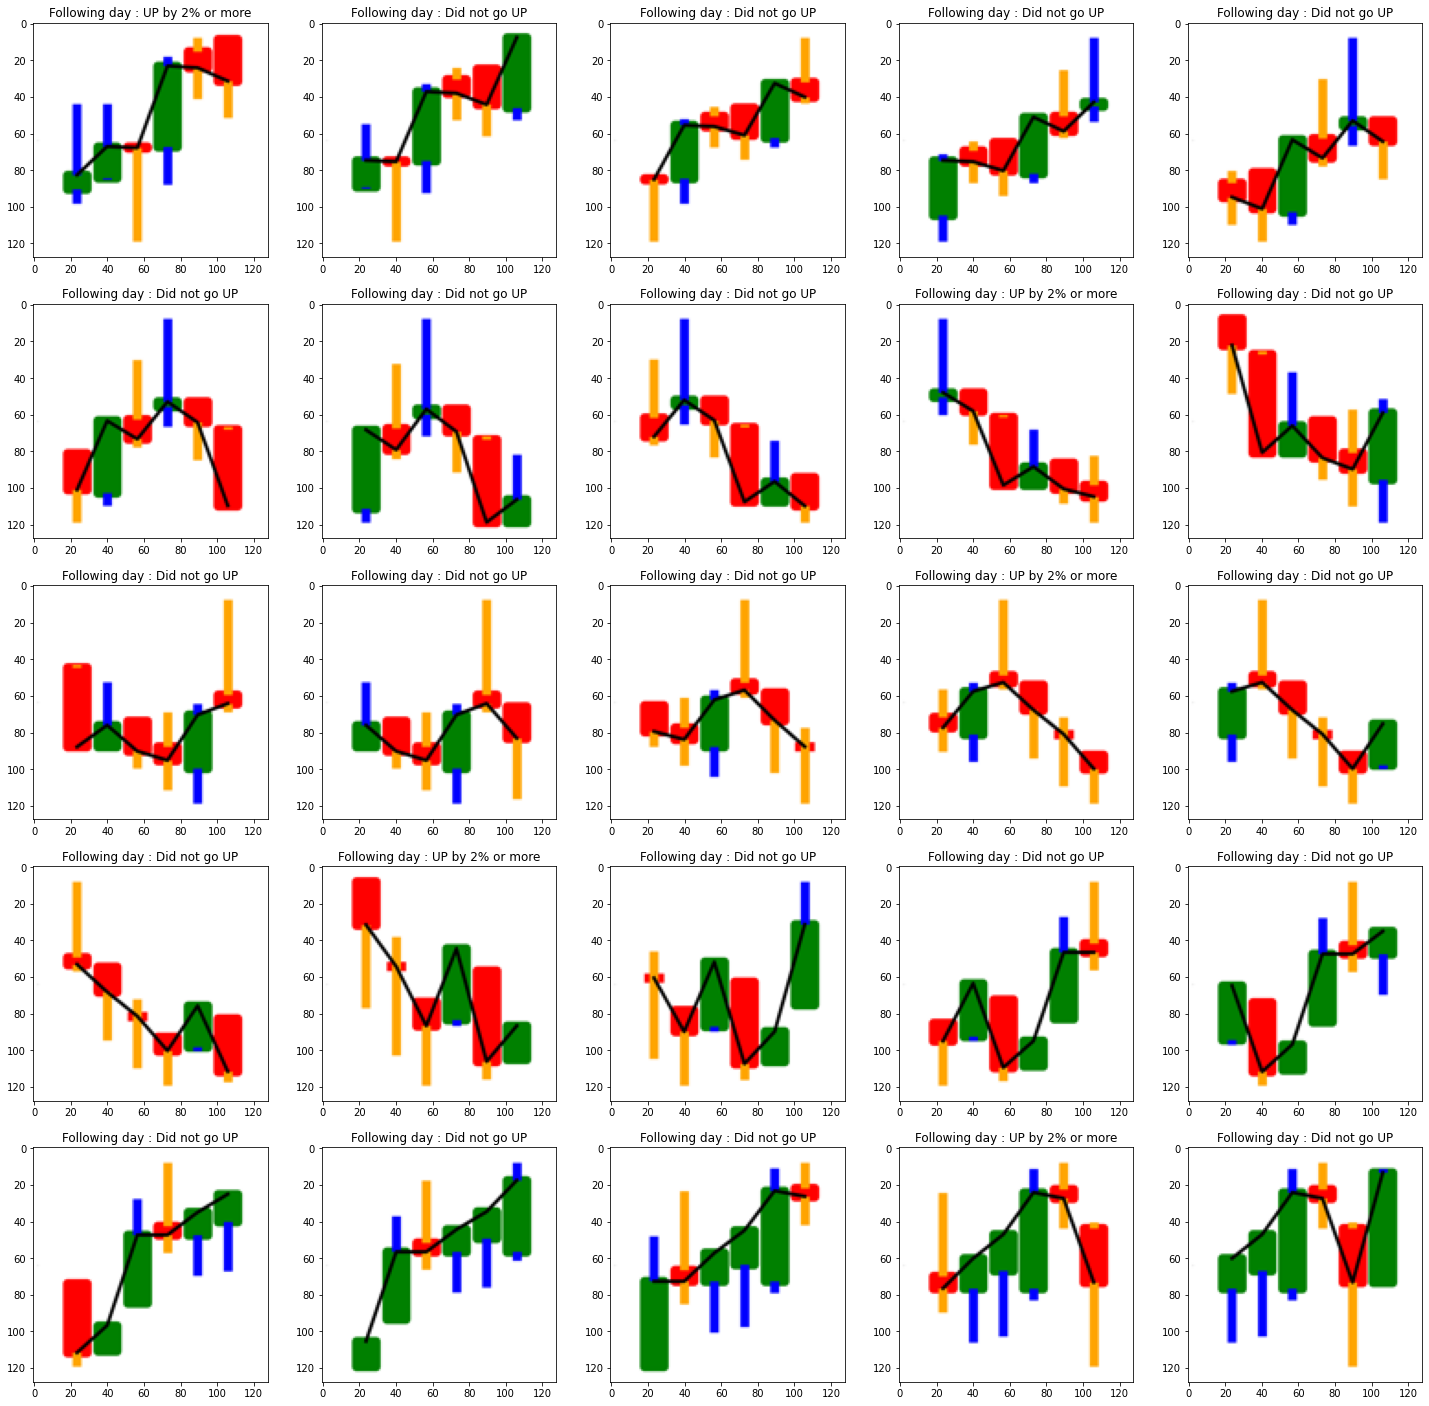

In [59]:

rows = 5
cols = 5
fig, axs = plt.subplots(rows,cols,figsize=(25,25))

for ax,i in zip(np.flip(axs.flatten(),0),range(rows*cols)):
    ax.imshow(set_x[i].astype('uint8'))
    if set_y[i] == 0:
        tgt = 'Did not go UP'
    else:
        tgt = 'UP by 2% or more'
    ax.set_title("Following day : " + tgt)
